In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.

In [11]:
## Helper function

def one_hot_encode(data, categorical_columns, drop_first=False, drop_original=True):
    encoded_data = data.copy()  # Create a copy of the original data
    
    for column_name in categorical_columns:
        unique_categories = data[column_name].unique()  # Get unique categories
        
        for category in unique_categories:
            new_column_name = f'{column_name}_{category}'  # Create a new column name
            
            # Apply one-hot encoding, with or without dropping the first category
            encoded_data[new_column_name] = (data[column_name] == category).astype(int)
            
            # If drop_first is True, drop the first category's column
            if drop_first and category == unique_categories[0]:
                encoded_data.drop(columns=new_column_name, inplace=True)
    
    # If drop_original is True, drop the original categorical columns
    if drop_original:
        encoded_data.drop(columns=categorical_columns, inplace=True)
    
    return encoded_data


def data_preprocessing_logistic(df):

    ## Dropping column which are not significant
    df1 = df.drop(['customerID','gender','PhoneService'],axis=1).copy()

    ## getting missing Values
    df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

    ## Encoding
    le = LabelEncoder()

    df1['Churn']=le.fit_transform(df1['Churn'])

    df1[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]= df1[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace('No internet service','No')
    df1[['MultipleLines']]= df1[['MultipleLines']].replace('No phone service','No')

    ## Treating Missing Values

    imputer = KNNImputer(n_neighbors=3, weights="uniform")

    df1['TotalCharges'] = imputer.fit_transform(df1[['TotalCharges']])


    X= df1.drop('Churn', axis=1)
    y= df1['Churn']

    for col in X.columns:
        col_type = X[col].dtype
        if col_type == 'object' or col_type.name == 'category':
            X[col] = X[col].astype('category')
            
    numerical= X.select_dtypes('number').columns

    categorical = X.select_dtypes('category').columns
    
    #X = one_hot_encode(X, categorical, drop_first=True, drop_original=True)
    

    return X,y

In [12]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [13]:
X,y = data_preprocessing_logistic(df)

In [20]:
data = pd.DataFrame(X)
df1 = pd.concat((X,y), axis = 1)

In [21]:
df1.shape

(7043, 18)

In [43]:
df1.head()
# no --> 0
# yes --> 1

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<Axes: xlabel='Churn', ylabel='count'>

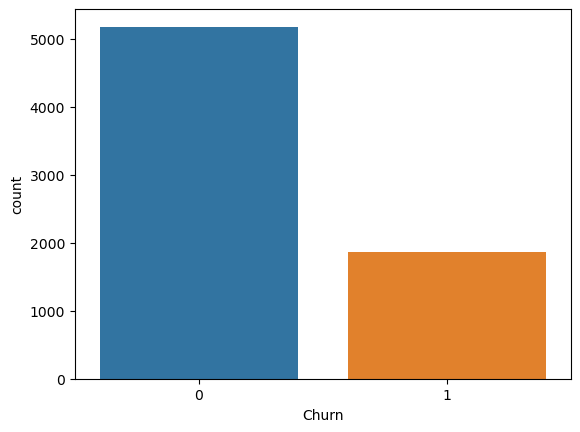

In [24]:
sns.countplot(df1, x = "Churn")

In [29]:
oht = OneHotEncoder()
ohe_df1 = pd.get_dummies(df1, drop_first = True)

X = ohe_df1.drop(["Churn"], axis=1)
y = ohe_df1["Churn"]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Assuming you have your data loaded into X (features) and y (target variable)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.8176011355571328
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
model = DecisionTreeClassifier()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.716820440028389
Precision: 0.7165776563479768
Recall: 0.716820440028389
F1 Score: 0.7166986885041116
Confusion Matrix:
 [[837 199]
 [200 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.46      0.46       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.794889992902768
Precision: 0.7819623945311586
Recall: 0.794889992902768
F1 Score: 0.7824667336016841
Confusion Matrix:
 [[946  90]
 [199 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a list to store cross-validation scores
cv_scores = []

# Define a range of k values
k_values = list(range(1, 21))

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best value of k
best_k = k_values[cv_scores.index(max(cv_scores))]

# Initialize the KNN classifier with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model to the training data
best_knn.fit(X_train, y_train)

# Predicting on the testing data
y_pred = best_knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the best k value
print("Best value of k:", best_k)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Best value of k: 16
Accuracy: 0.7913413768630234
Precision: 0.7778399515355695
Recall: 0.7913413768630234
F1 Score: 0.7680756559200422
Confusion Matrix:
 [[975  61]
 [233 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.70      0.38      0.49       373

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409



In [50]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Predicting on the testing data
y_pred = clf.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.57      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize a list to store cross-validation scores
cv_scores = []

# Define a range of k values
k_values = list(range(1, 21))

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best value of k
best_k = k_values[cv_scores.index(max(cv_scores))]

# Initialize the KNN classifier with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model to the training data
best_knn.fit(X_train_resampled, y_train_resampled)

# Predicting on the testing data
y_pred = best_knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the best k value
print("Best value of k:", best_k)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Best value of k: 1
Accuracy: 0.709013484740951
Precision: 0.733260789454861
Recall: 0.709013484740951
F1 Score: 0.7182261987664014
Confusion Matrix:
 [[785 251]
 [159 214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1036
           1       0.46      0.57      0.51       373

    accuracy                           0.71      1409
   macro avg       0.65      0.67      0.65      1409
weighted avg       0.73      0.71      0.72      1409



In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the decision tree classifier
model = DecisionTreeClassifier()

# Fitting the model to the training data
model.fit(X_train_resampled, y_train_resampled)

# Predicting on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7253371185237757
Precision: 0.7420177129840463
Recall: 0.7253371185237757
F1 Score: 0.7320655852923456
Confusion Matrix:
 [[809 227]
 [160 213]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1036
           1       0.48      0.57      0.52       373

    accuracy                           0.73      1409
   macro avg       0.66      0.68      0.67      1409
weighted avg       0.74      0.73      0.73      1409



In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Assuming you have your data loaded into X (features) and y (target variable)

# Initialize the logistic regression model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train_resampled, y_train_resampled)

# Predicting on the testing data
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.7757274662881476
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.56      0.69      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



/Users/lakshaykarhana/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Conclusion:
##### Logistic would be our final model as its Recall for 1 is coming out to be 0.69 better than other 3 models